<a href="https://colab.research.google.com/github/laffertyryan0/statistical-dimension/blob/main/StatisticalDimensionMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

def projPD_old(x):
  e,v = tf.linalg.eigh(x)
  d = tf.linalg.diag(tf.nn.relu(tf.math.real(e)))
  out = v@d@tf.transpose(v,[0,2,1])
  return (out + tf.transpose(out,perm = [0,2,1]))/2

def projPD(x):
  Lx = x + (-1 + math.sqrt(2))*tf.linalg.diag(tf.linalg.diag_part(x))
  PLx = projPD_old(Lx)
  out = PLx + (-1 + 1/math.sqrt(2))*tf.linalg.diag(tf.linalg.diag_part(PLx))
  return out

def projZG(A):
  A = tf.cast(A,tf.float32)
  return lambda x:tf.math.multiply(x,A)

def randsymmats(n,depth = 1000):
  Z = tf.random.normal((depth,n,n))
  diag = tf.linalg.diag(tf.linalg.diag_part(Z))
  rest = tf.linalg.band_part(Z,-1,0) - diag
  Z = rest + tf.transpose(rest,perm=[0,2,1])+diag
  return(Z)

def dykstra(pC,pD,x0,niter = 1000):
  d = tf.shape(x0)
  xk = tf.zeros(d)
  yk = tf.zeros(d)
  wk = x0
  for i in range(niter):
    xkp1 = pC(wk)
    ykp1 = pD(xkp1)
    wkp1 = wk - (xkp1 - ykp1)
    xk = xkp1
    yk = ykp1
    wk = wkp1
  return(xk)

def statdim(A, nreps = 1000):
  ssum = 0
  n = tf.shape(A)[0]
  pC = projPD
  pD = projZG(A)
  picz = dykstra(pC,pD,randsymmats(n,nreps))
  picz2 = tf.math.square(picz)
  symnorm = tf.reduce_sum(tf.linalg.band_part(picz2,-1,0))
  return symnorm/nreps



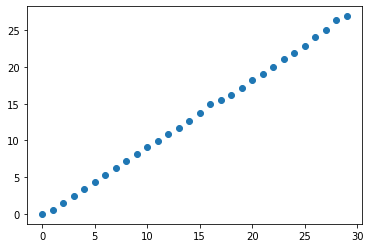

In [6]:
def chainGraph(n):
  A = np.zeros((n,n))
  for i in range(n):
    for j in range(n):
      if(i == j or abs(i-j)==1):
        A[i,j] = 1
  return tf.constant(A)

k = 30
x = np.arange(k)
y = np.zeros(k)
for i in x:
  y[i] = statdim(chainGraph(i))

plt.scatter(x,y)

In [7]:
from scipy import stats

stats.linregress(x,y)

LinregressResult(slope=0.9340992651473692, intercept=-0.3245612393143329, rvalue=0.9997460654462206, pvalue=1.1332880449846107e-47, stderr=0.003978988070362376)

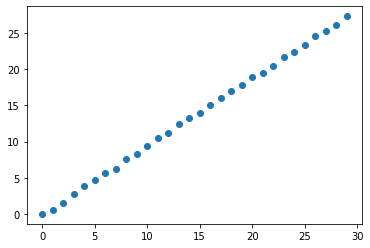

In [10]:
def cycleGraph(n):
  A = np.zeros((n,n))
  for i in range(n):
    for j in range(n):
      if(i == j or abs(i-j)==1 or (set([i,j])==set([0,n-1]))):
        A[i,j] = 1
  return tf.constant(A)

k = 30
x = np.arange(k)
y = np.zeros(k)
for i in x:
  y[i] = statdim(cycleGraph(i),nreps = 1000)

plt.scatter(x,y)

In [11]:

stats.linregress(x,y)

LinregressResult(slope=0.942026467424081, intercept=-0.07353590714034475, rvalue=0.9997603930057448, pvalue=5.0265004387877625e-48, stderr=0.003897865853908969)

In [4]:
A1 = tf.constant([[1,0,0,0,1],[0,1,0,0,1],[0,0,1,0,1],[0,0,0,1,1],[1,1,1,1,1]])
A2 = tf.constant([[1,1,0,0,0],[0,1,1,0,0],[0,0,1,1,0],[1,0,0,1,0],[0,0,0,0,1]])
print(statdim(A1,100))

tf.Tensor(4.180205, shape=(), dtype=float32)


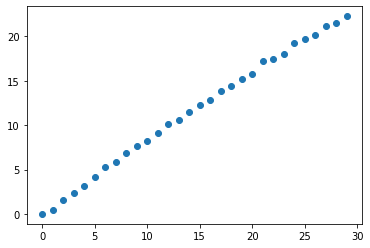

In [16]:
def starGraph(n):
  A = np.zeros((n,n))
  for i in range(n):
    for j in range(n):
      if(i == j or j==n-1 or i==n-1):
        A[i,j] = 1
  return tf.constant(A)

k = 30
x = np.arange(k)
y = np.zeros(k)
for i in x:
  y[i] = statdim(starGraph(i),nreps = 1000)

plt.scatter(x,y)

In [17]:
stats.linregress(x,y)

LinregressResult(slope=0.7755227754524472, intercept=0.3489813799499206, rvalue=0.9988847476219299, pvalue=1.1199259011786763e-38, stderr=0.006927565093945265)

In [ ]:
def chainGraph(n):
  A = np.zeros((n,n))
  for i in range(n):
    for j in range(n):
      if(i == j or abs(i-j)==1):
        A[i,j] = 1
  return tf.constant(A)

k = 5
x = np.arange(k)
y = np.zeros(k)
for i in x:
  y[i] = statdim(chainGraph(100*i),100)

plt.scatter(x,y)